In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('results-survey080319.csv')
#range1 = range(0,6)
df = df.drop(df.columns[[range(0,6)]], axis=1)
df.rename(columns={'1._Please_select_your_country:': 'Country'\
                       ,'2._Please_select_your_business_category?': 'Business Category', \
                       '4._Have_you_ever_run_any_internet_measurement_campaign_-_either_as_a_business_owner_or_a_home_broadband/mobile_device_user?'\
                       : 'Campaign Run'}, inplace=True)
types_of_network = ['Country',
                    'Campaign Run',
                    '5._Please_provide_more_information.',
                    '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',]
#df[df['Country'].isnull()]
df['Country'].replace(np.nan, "Other", inplace=True)
df

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Country,Business Category,2._Please_select_your_business_category?_[Other],3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],...,Question_time:_ques22,Question_time:_ques23,Question_time:_ques24,Question_time:_ques25,Group_time:_Conclusion,Question_time:_ques26,Question_time:_ques27,Question_time:_ques28,Question_time:_ques29,Question_time:_ques30
0,Mauritius,Datacentre,NaN,No,No,No,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,41.60,NaN,NaN,NaN,NaN,NaN
1,Congo-Kinshasa,End-user (Home/Mobile broadband),NaN,No,No,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,143.55,NaN,NaN,NaN,NaN,NaN
2,Sudan,Academic Institution,NaN,No,No,No,Yes,No,Yes,Yes,...,NaN,NaN,NaN,NaN,126.32,NaN,NaN,NaN,NaN,NaN
3,Zimbabwe,Regulator/Government Agency,NaN,No,No,No,No,No,No,Yes,...,NaN,NaN,NaN,NaN,93.74,NaN,NaN,NaN,NaN,NaN
4,Madagascar,Internet eXchange Point (IXP),NaN,No,No,No,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,767.43,NaN,NaN,NaN,NaN,NaN
5,South Africa,Enterprise Network,NaN,Yes,No,No,No,Yes,No,Yes,...,NaN,NaN,NaN,NaN,82.52,NaN,NaN,NaN,NaN,NaN
6,Nigeria,Internet Service Provider (ISP),NaN,No,No,No,No,Yes,No,No,...,NaN,NaN,NaN,NaN,136.47,NaN,NaN,NaN,NaN,NaN
7,Burkina Faso,Telecom (Mobile) Operator,NaN,No,No,Yes,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,149.86,NaN,NaN,NaN,NaN,NaN
8,Togo,End-user (Home/Mobile broadband),NaN,No,Yes,Yes,No,No,No,No,...,NaN,NaN,NaN,NaN,74.61,NaN,NaN,NaN,NaN,NaN
9,Cote d'Ivoire,Civil society,NaN,No,No,No,No,No,No,Yes,...,NaN,NaN,NaN,NaN,437.37,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns.tolist()

['Country',
 'Business Category',
 '2._Please_select_your_business_category?_[Other]',
 '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',
 'Campaign Run',
 '5._Please_provide_more_information.',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
 '6._Please_state_your_main_purpos

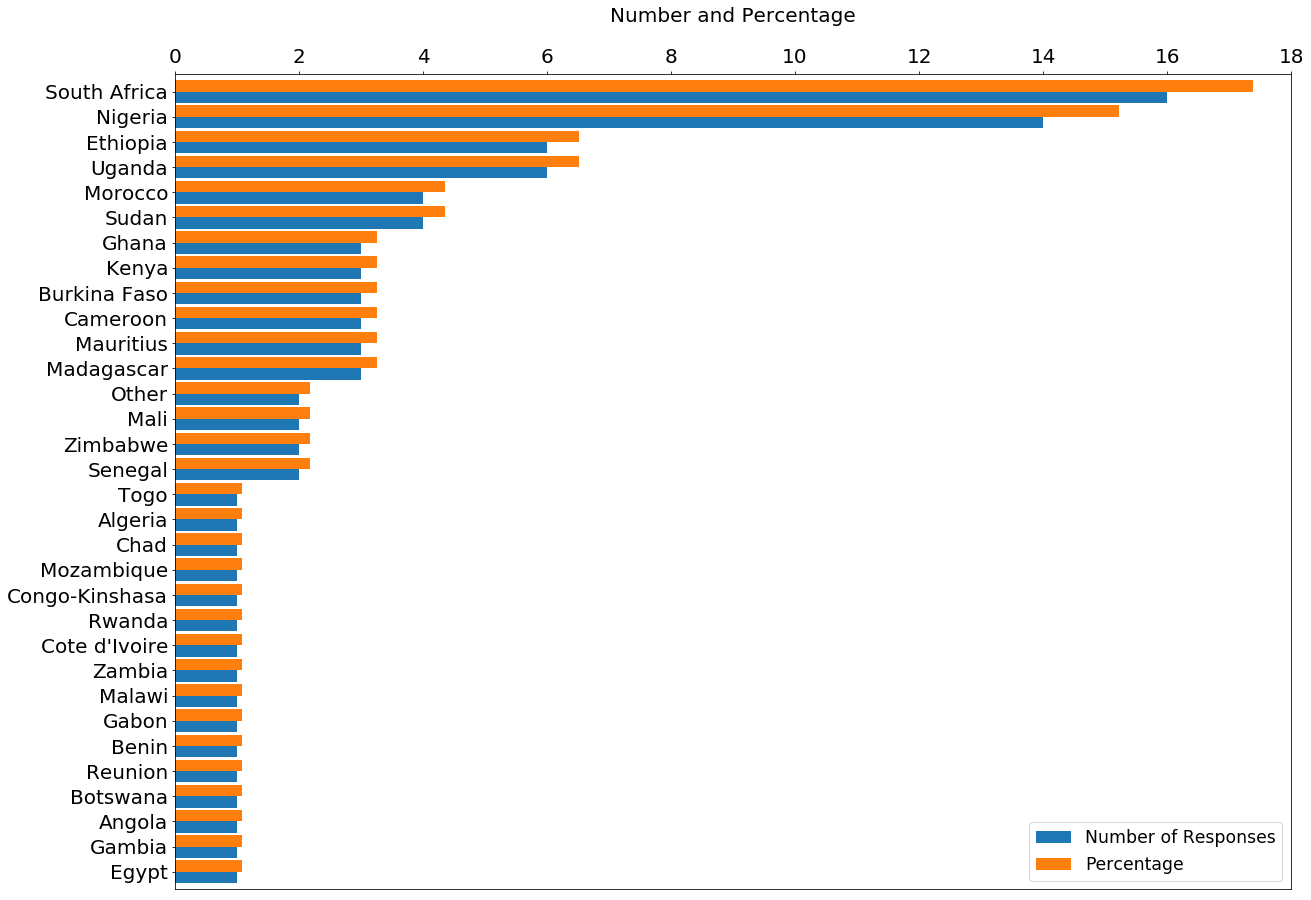

In [23]:
#Number and Percentage of responses per country
def country_responses():
    col1 = df['Country'].value_counts(dropna=False)
    col2 = df['Country'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    final.columns = ['Number of Responses', 'Percentage']
    final = final.iloc[::-1] #Reversing the index to have the higher values on top of the bar chart
    ax = final.plot(kind='barh', figsize=(20,15), width=.9)
    ax.set_xlim(0,18,2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(fontsize=20)
    plt.xlabel("Number and Percentage\n", fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize="xx-large")
    plt.show()
    return
country_responses()

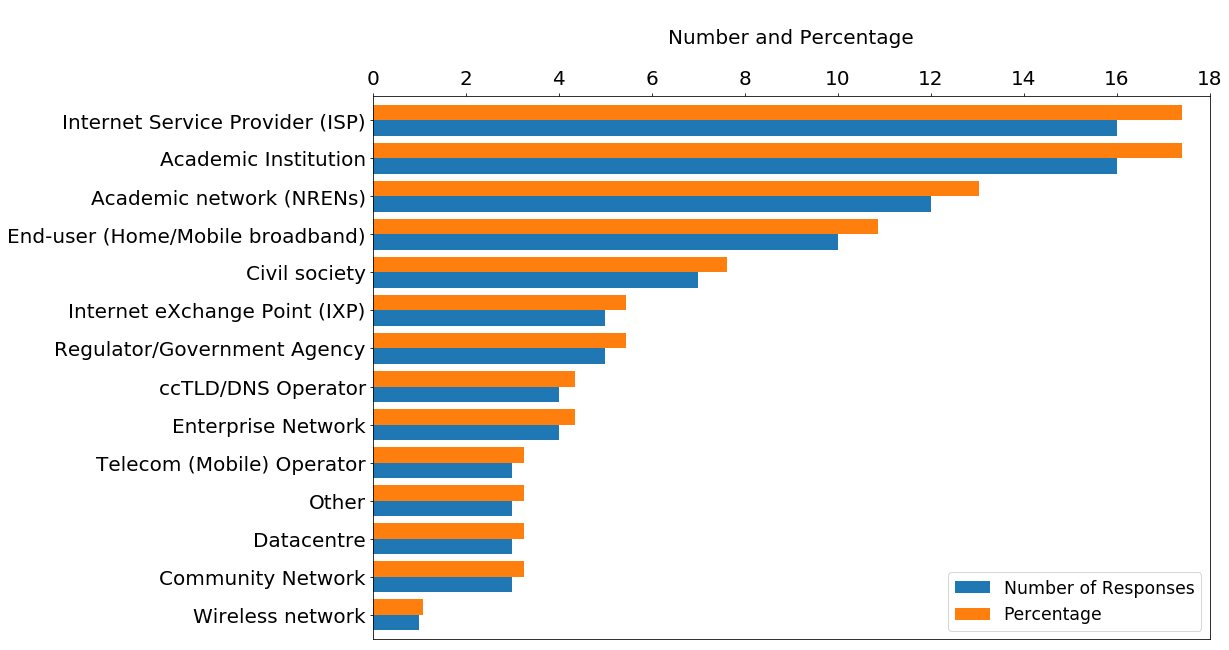

In [24]:
#Number of Responses by Business Category
def business_responses():
    col1 = df['Business Category'].value_counts(dropna=False)
    col2 = df['Business Category'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    final = final.iloc[::-1]
    final.columns = ['Number of Responses', 'Percentage']
    ax = final.plot(kind='barh', figsize=(15,10), legend=True, width=.8)
    ax.set_xlim(0,18,2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(fontsize=20)
    plt.xlabel("\nNumber and Percentage\n", fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize="xx-large")
    plt.show()
    return
business_responses()



Type 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.


Invalid response.


Type 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.

1




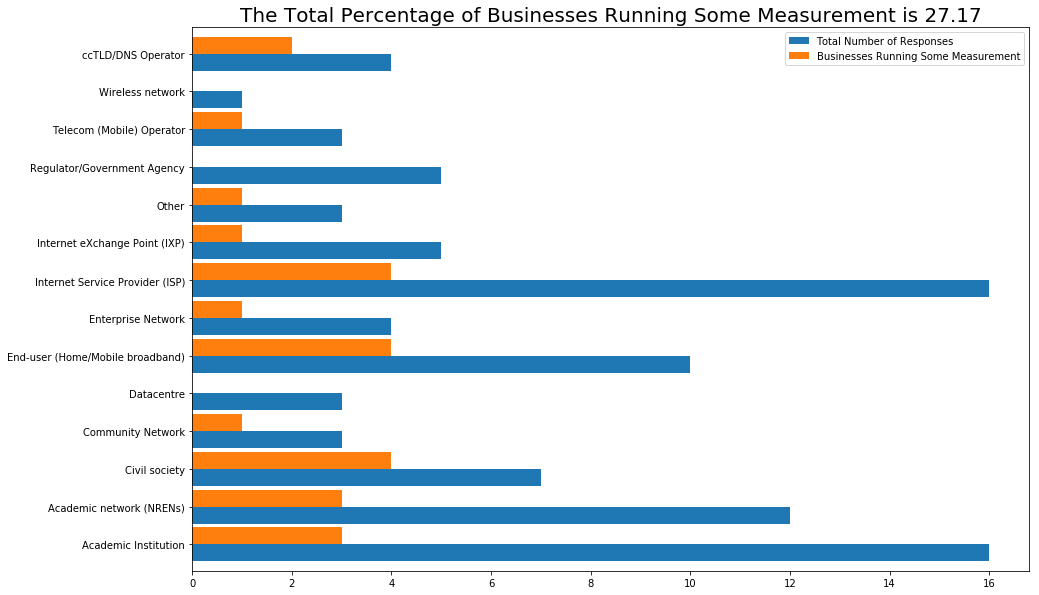

In [25]:
#Whether a business category has run measurements or not
def measurement_campaign():
    coun = df['Business Category'].value_counts(dropna=False)
    
    while True:
        value = input("\n\nType 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.\n\n")
        if value in ("yes", "Yes", "1"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"]
            final2 = final.groupby('Business Category').agg({'Campaign Run': 'count'})
            text = "Running Some Measurement"
            break
        if value in ("No", "no", "0"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="No (Go to Question 6)"]
            final2 = (final.groupby('Business Category').agg({'Campaign Run': 'count'})).sort_values('Campaign Run',\
                                                                                                 ascending=False)
            text = "Not Running Any Measurement"
            break
        print("Invalid response.")

    new = pd.concat([coun, final2], axis=1, sort=True)
    new.columns = ['Total Number of Responses', 'Businesses ' + text]
    percentage = round((new.T.iloc[1].sum()/new['Total Number of Responses'].sum())*100, 2)
    ax = new.plot(kind='barh', figsize=(15,10), legend=True, width=.9)
    
    ax.set_title("The Total Percentage of Businesses " + text + " is " + str(percentage), fontsize = 20)
    plt.show()
    return 
   
measurement_campaign()

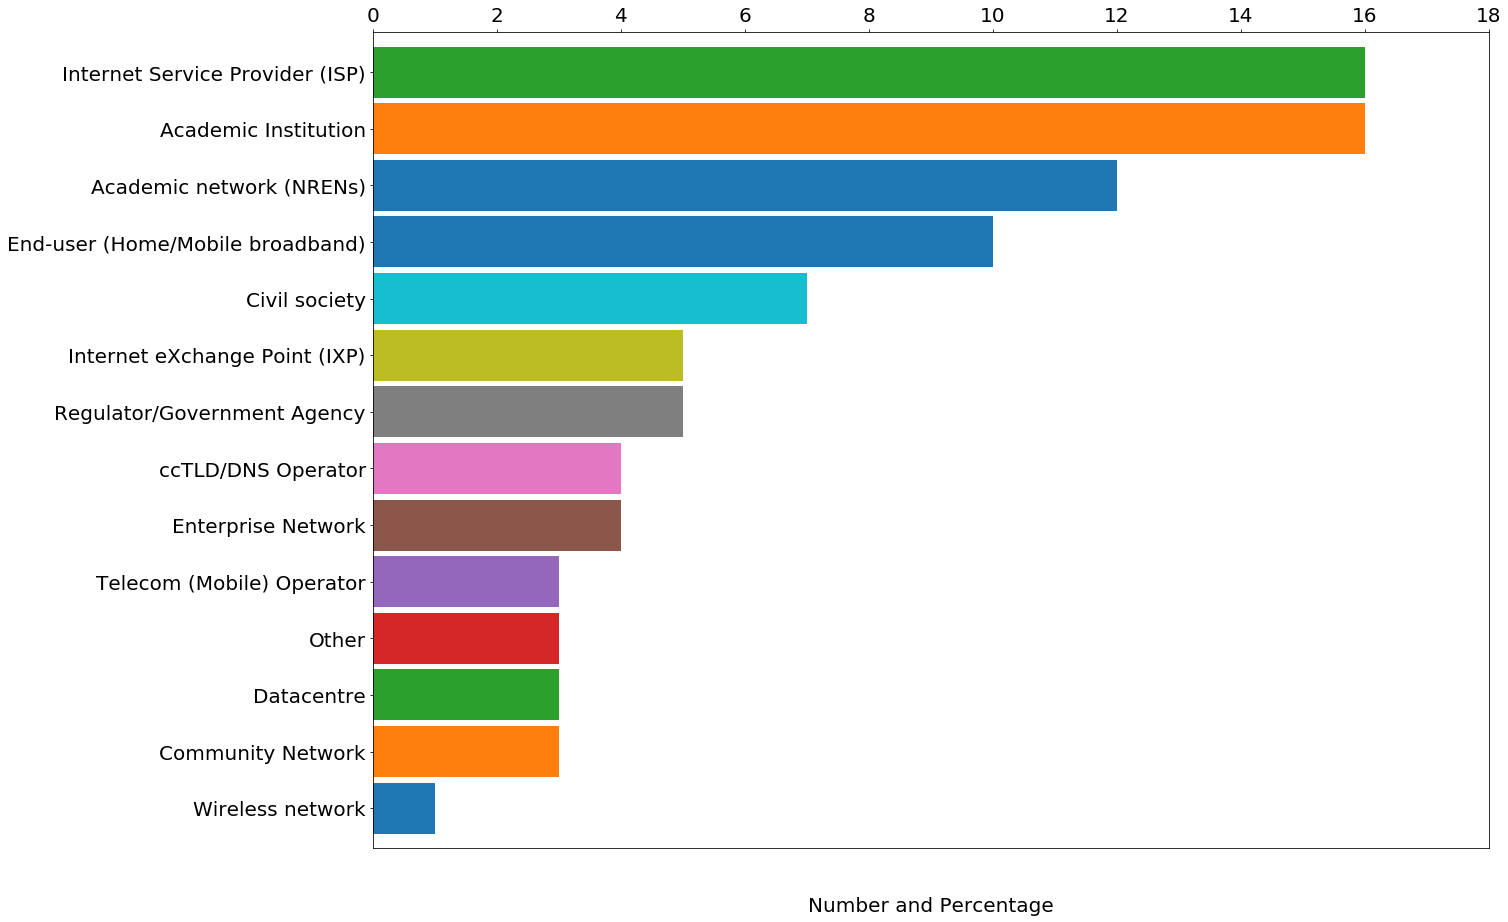

In [26]:
#Number of Responses by Business Category
def network_responses():
    col1 = df['Business Category'].value_counts(dropna=False)
    col1 = col1.iloc[::-1]
    ax = col1.plot(kind='barh', figsize=(20,15), legend=False, width=.9)
    ax.set_xlim(0,18,2)
    ax.xaxis.tick_top()
    plt.xticks(fontsize=20)
    plt.xlabel("\n\nNumber and Percentage", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
network_responses()

In [27]:
#Further Information from businesses that run campaign(s)
def campaign_info():
    df2 = df.set_index('Business Category')
    df3 = df2[types_of_network]
    while True:
        input1 = input("To read further info supplied by respondents about their measurement campaign, choose a value between 0 and 24 and hit Enter or leave blank to have all 25 responses displayed.\n\n\n\n")
        if (input1.isdigit()):
            value = int(input1)
            if value in range(0, 24):
                text = tuple(list(df2[['5._Please_provide_more_information.']].dropna().values[value]))[0]
                print(text)
                return df3.loc[df3['5._Please_provide_more_information.'] == text]
                break
            else:
                print("Enter values between 0 and 24. \n\n\n\n")
        elif input1 == "":
            return df3.loc[df3['Campaign Run']== "Yes"]
    
campaign_info()

To read further info supplied by respondents about their measurement campaign, choose a value between 0 and 24 and hit Enter or leave blank to have all 25 responses displayed.






,Country,Campaign Run,5._Please_provide_more_information.,3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],3._What_type_of_network_are_you_operating?_[N/A],3._What_type_of_network_are_you_operating?_[Other]
Business Category,,,,,,,,,,,,
Academic Institution,Sudan,Yes,Our own network monitory\nAltlas\nKida,No,No,No,Yes,No,Yes,Yes,No,NaN
Internet eXchange Point (IXP),Madagascar,Yes,La mésure de trafic réseau internet est un élé...,No,No,No,Yes,Yes,No,Yes,No,NaN
Enterprise Network,South Africa,Yes,Ran own RIPE probe on home network,Yes,No,No,No,Yes,No,Yes,No,WAN
Internet Service Provider (ISP),Nigeria,Yes,Regular user satisfaction measurement campaign,No,No,No,No,Yes,No,No,No,NaN
Telecom (Mobile) Operator,Burkina Faso,Yes,I'm hosting RIPE ATLAS and Anchor at Orange Bu...,No,No,Yes,Yes,Yes,No,Yes,No,NaN
Civil society,Gambia,Yes,For monitoring interference and also our projects,No,No,Yes,Yes,No,Yes,Yes,No,NaN
Internet Service Provider (ISP),Angola,Yes,atlas probes,No,No,No,No,Yes,No,No,No,NaN
Academic network (NRENs),Reunion,Yes,L'accès à Internet des îles de la Zone Océan I...,Yes,Yes,No,No,No,No,No,No,NaN
Academic Institution,Nigeria,Yes,"In a research. ""Influence of personality trait...",No,No,No,No,No,No,Yes,No,NaN


In [131]:
#Number of Networks Operated
def country():
    #col1 = df['Business Category'].value_counts(dropna=False)
    df1 = df[types_of_network]
    freq = []
    network = []
    number = 3
    for col in df1.columns[number:]:
        if col == "3._What_type_of_network_are_you_operating?_[Other]":
            new_network = tuple(df1[col].dropna().unique())
            for net in new_network:
                freq.append(1)
                network.append(net)
        else:
            value = len(df1[df1[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            network.append(ntype)
    values = zip(network, freq)
    final = list(set(values))
    #print(values
    return final
 
country()

[('Community_network_(Mesh_network)', 15),
 ('leased line', 1),
 ('N/A', 4),
 ('WAN', 1),
 ('FTTX', 20),
 ('ADSL', 20),
 ('Local_Area_Network', 49),
 ('Mobile_(2G,_3G,_LTE,_LTE-A)', 27),
 ('Wireless_network_(WIFI,_Wimax)', 42),
 ("Réseau d'interconnexion d'opérateurs", 1),
 ('IP_Transit_Services/Wholesale', 19)]